<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n250.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.744842  198.768724 -0.023882
      1.0    57.329540  88.266135  33.974483  ...  189.468946  189.549901 -0.080955
      2.0    45.215694  22.043105  89.071799  ...  167.020820  166.355867  0.664953
      3.0    69.375325  71.150993  24.742899  ...  175.511683  175.271125  0.240558
      4.0    87.837297  47.725671  65.999025  ...  211.215726  211.564380 -0.348654
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  22.462586  64.986534  22.662754  ...  120.330628  120.037904  0.292724
      246.0  65.758199  97.986011  91.293587  ...  264.572663  265.002896 -0.430233
      247.0  43.850566  82.988350  93.879229  ...  231.139035  230.626058  0.512977
      248.0  44.150395  26.941848  96.556657  ...  177.522166  177.503148  0.019018
      249.0  88.062161  23.980807  27.737661  ...  148.806946  149.785678 -0.978732

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.744842  198.768724 -0.023882
      1.0    57.329540  88.266135  33.974483  ...  189.468946  189.549901 -0.080955
      2.0    45.215694  22.043105  89.071799  ...  167.020820  166.355867  0.664953
      3.0    69.375325  71.150993  24.742899  ...  175.511683  175.271125  0.240558
      4.0    87.837297  47.725671  65.999025  ...  211.215726  211.564380 -0.348654
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  22.462586  64.986534  22.662754  ...  120.330628  120.037904  0.292724
      246.0  65.758199  97.986011  91.293587  ...  264.572663  265.002896 -0.430233
      247.0  43.850566  82.988350  93.879229  ...  231.139035  230.626058  0.512977
      248.0  44.150395  26.941848  96.556657  ...  177.522166  177.503148  0.019018
      249.0  88.062161  23.980807  27.737661  ...  148.806946  149.785678 -0.978732

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.744842  198.768724 -0.023882
      1.0    57.329540  88.266135  33.974483  ...  189.468946  189.549901 -0.080955
      2.0    45.215694  22.043105  89.071799  ...  167.020820  166.355867  0.664953
      3.0    69.375325  71.150993  24.742899  ...  175.511683  175.271125  0.240558
      4.0    87.837297  47.725671  65.999025  ...  211.215726  211.564380 -0.348654
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  22.462586  64.986534  22.662754  ...  120.330628  120.037904  0.292724
      246.0  65.758199  97.986011  91.293587  ...  264.572663  265.002896 -0.430233
      247.0  43.850566  82.988350  93.879229  ...  231.139035  230.626058  0.512977
      248.0  44.150395  26.941848  96.556657  ...  177.522166  177.503148  0.019018
      249.0  88.062161  23.980807  27.737661  ...  148.806946  149.785678 -0.978732

[250000 rows x 7 columns]

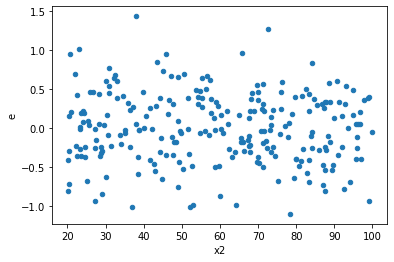

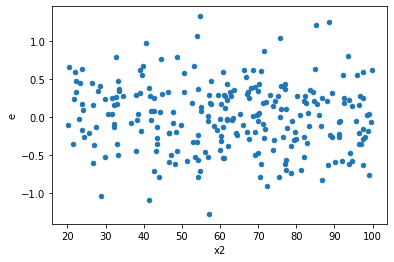

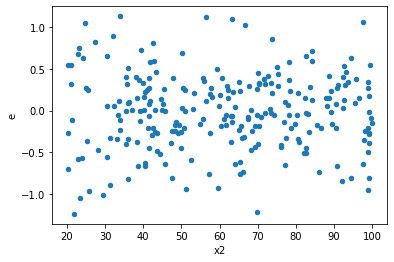

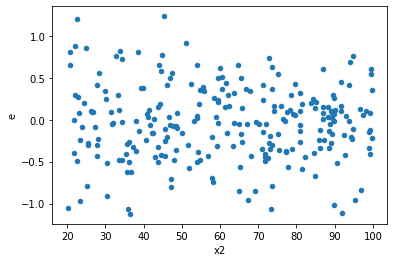

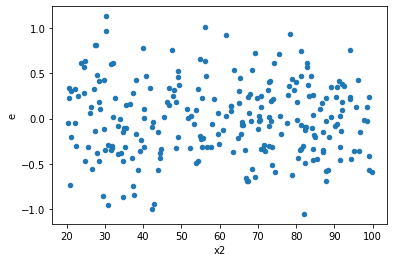

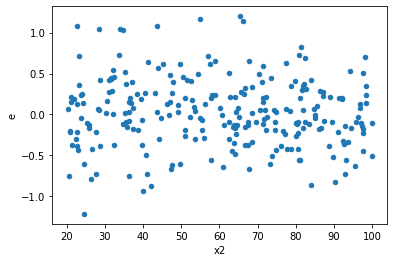

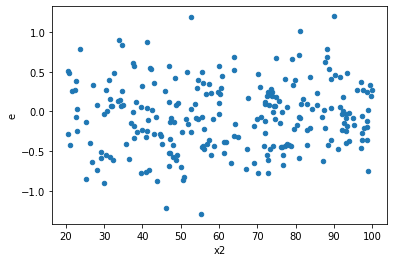

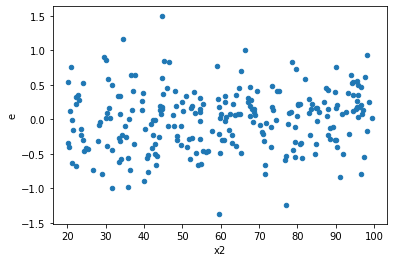

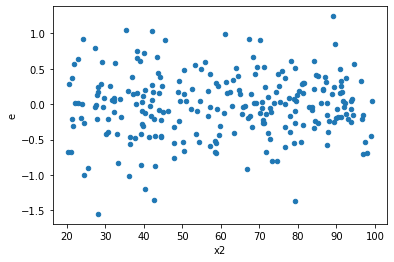

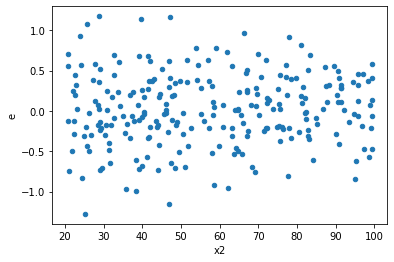

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
11.0,97.0,97.0,19.96820745909787,21.048388916465754,0.20585780885667906,0.21699370016975003,1.0540950638448887,0.7958287365693844,0.6020856317153078,0.3979143682846922,Reject001=1 : Homoscedasticity
26.0,97.0,97.0,17.24720924485204,21.644570177123853,0.1778062808747633,0.2231398987332356,1.254960722621507,0.26515555928440526,0.8674222203577974,0.13257777964220263,Reject001=1 : Homoscedasticity
38.0,97.0,97.0,19.95064068314889,24.094316214327236,0.2056767080736999,0.24839501251883747,1.2076963640911171,0.35432354914701936,0.8228382254264903,0.17716177457350968,Reject001=1 : Homoscedasticity
45.0,97.0,97.0,21.909624634361155,24.304102821447927,0.22587241891093973,0.2505577610458549,1.1092888731343886,0.6105215447314358,0.6947392276342821,0.3052607723657179,Reject001=1 : Homoscedasticity
54.0,97.0,97.0,18.724867520870518,19.92423510078439,0.1930398713491806,0.2054044855750968,1.0640521263275733,0.7604280243907677,0.6197859878046161,0.38021401219538387,Reject001=1 : Homoscedasticity
58.0,97.0,97.0,17.94697539337542,18.73125178742879,0.185020364880159,0.1931056885301937,1.043699641686858,0.8336081178003889,0.5831959410998055,0.41680405890019445,Reject001=1 : Homoscedasticity
87.0,97.0,97.0,20.024000300886605,20.37025824788042,0.2064329927926454,0.2100026623492827,1.0172921465137257,0.9328908553874287,0.5335545723062857,0.46644542769371433,Reject001=1 : Homoscedasticity
90.0,97.0,97.0,17.450718375036622,18.197358700788733,0.17990431314470745,0.18760163609060548,1.0427856498343462,0.8369677902887545,0.5815161048556228,0.4184838951443772,Reject001=1 : Homoscedasticity
117.0,97.0,97.0,16.92046552118677,18.68752253077804,0.17443778887821412,0.19265487145132,1.1044331201986535,0.625694862840056,0.687152568579972,0.312847431420028,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,22.097822672204497,17.938803836281263,0.2278126048680876,0.18493612202351817,0.8117905597480148,0.3061939122160842,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,20.858810062685958,18.420549387400598,0.21503927899676245,0.18990257100412988,0.8831064347411106,0.541608796982425,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,22.85130058741587,17.02030947389735,0.23558041842696775,0.17546710797832318,0.7448289172332874,0.14862388148238453,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,24.482217515962766,14.93144664850459,0.25239399500992543,0.15393243967530504,0.6098894693166199,0.01566713135332595,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,19.989203270367693,13.65117996317032,0.20607426051925457,0.14073381405330226,0.682927667427698,0.061823111129958905,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,20.59595404677388,12.475602707539386,0.21232942316261733,0.1286144609024679,0.6057307507681853,0.01429838952075013,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,21.325133071074017,14.886669958539963,0.21984673269148472,0.153470824314845,0.6980809877680267,0.07829283560094986,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,22.032087091626074,14.38458564044947,0.2271349184703719,0.14829469732422135,0.6528925553274861,0.036955011262720106,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,25.51944575282996,14.521733647030308,0.2630870696168037,0.14970859429928152,0.5690458087405731,0.005936865980751567,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      785
Reject001=0 : Heteroscedasticity    215
Name: Result_test, dtype: int64